# Exploration of a Dataset of Dry Beans 

### Objectives:

**The purpose of this project is to continue honing skills for exploration via a new data set, and implement various machine learning algorithms and grid search to find the best classification algorithm for this problem.**

From numerical CVdata taken from photos of dry beans, we hope to classify them into their respective types. We have data collected for the following types of beans: Barbunya, Bombay, Cali, Dermason, Horoz, Seker, and Sira.

## Importing Packages

We begin with importing the packages we will use in this exploration. 

Pandas is effective for cleaning and aggregating our data.
numpy is effective for quick numeric transformations.
matplotlib and seaborn are helpful for visualizing data.
sklearn is a machine learning library that helps with many types of ML regression and classification.

Especially later on, we will encounter a couple FutureWarnings, mentioning the development not planning to support some of our methods. However, that is irrelevant to the current versions of Python and Sklearn that we utilize here. To keep our outputs concise and relevant, we import simplefilter to filter out only the futurewarnings.

In [1]:
# utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn utility
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import export_text

# sklearn grid search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Exploratory Data Analysis

We will first read our data set that we collected from [a zip file in this archive](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset).

In [2]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

We want to see what type of data we have, both in terms of python types and in terms of categorical or quantitative data.

In [3]:
for col in df.columns:
    print("Type of", col, type(df[col][0]))

Type of Area <class 'numpy.int64'>
Type of Perimeter <class 'numpy.float64'>
Type of MajorAxisLength <class 'numpy.float64'>
Type of MinorAxisLength <class 'numpy.float64'>
Type of AspectRation <class 'numpy.float64'>
Type of Eccentricity <class 'numpy.float64'>
Type of ConvexArea <class 'numpy.int64'>
Type of EquivDiameter <class 'numpy.float64'>
Type of Extent <class 'numpy.float64'>
Type of Solidity <class 'numpy.float64'>
Type of roundness <class 'numpy.float64'>
Type of Compactness <class 'numpy.float64'>
Type of ShapeFactor1 <class 'numpy.float64'>
Type of ShapeFactor2 <class 'numpy.float64'>
Type of ShapeFactor3 <class 'numpy.float64'>
Type of ShapeFactor4 <class 'numpy.float64'>
Type of Class <class 'str'>


**Observations**: 

The class of bean is a **categorical** variable, with 7 potential class labels.

Aside from class, each feature seem to be floating points or integers. In other words, all other variables are **continuous**.

From the archive, we mention the following properties of each feature: 

1.) Area is the number of pixels within a "bean zone."
<br>
2.) Perimeter is the length of the border around the bean.
<br>
3.) Major axis length is the distance between the ends of the longest line that can be drawn from a bean.
<br>
4.) Minor axis length is the longest line (orthogonal to the major axis) that can be drawn from the bean.
<br>
5.) Aspect ratio is the relationship between L and l.
<br>
6.) Eccentricity is the eccentricity of the ellipse having the same moments as the region.
<br>
7.) Convex area is the number of pixels in the smallest convex polygon that can contain the area of a bean.
<br>
8.) Equivalent diameter is the diameter of a circle with the same area as the bean seed area.
<br>
9.) Extent is the ratio of the pixels in the bounding box to the bean area.
<br>
10.)Solidity (aka convexity) is the ratio of the pixels in the convex shell to those found in beans.
<br>
11.)Roundness is calculated with the following formula: $\frac{(4\pi A)}{(P^2)}$
<br>
12.)Compactness measures the roundness of an object, calculated with $\frac{Ed}{L}$
<br>
13.)ShapeFactor 1, 2, 3, and 4 are all miscellaneous values describing the bean.
<br>
17.)Class is our class label. Varies between Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira.

Additionally, the source implies that every bean photo was taken with the same high-resolution camera, so we can be assured that the feature extraction based on number of pixels will be consistent.

There have been a few typos with the feature names, so those will be updated accordingly.

In [4]:
df.rename(columns={'roundness': 'Roundness', 'AspectRation': 'AspectRatio'}, inplace=True)
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

Generally, having an understanding of our data can be helpful. There are a few ways to do this. We'll first look at the multicollinearity of the data, or how correlated our features are to each other. Generally we hope to find a low amount of correlation, because if they are highly correlated then there could be some problems when trying to generalize our data. If we can't assume that our features are independent, then our model will be much weaker.

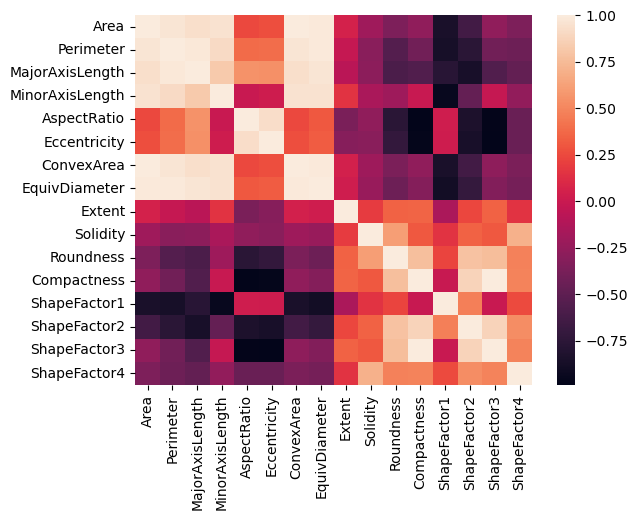

In [5]:
sns.heatmap(df.corr(), annot=False)
plt.show()

**Observations**:

It seems that there are three main groups of correlated data: area, perimeter, majoraxislength, minoraxislength, convexarea, and equivdiameter are all highly correlated to each other. Aspectratio and eccentricity are all correlated to each other. Then, roundness, compactness, shapefactor2, and shapefactor3 are all correlated. 

This is understandable, yet still worrying. It makes sense that if a bean is larger, that many of its aspects will grow proportionally. However, when using multiple of these variables for a model, the benefit of multiple of those types of variables will diminish.


### Plots to find Clusters

To examine the quantitative data, it may be helpful to find the centers and spread of the data. We do this by the pandas method describe(), for the data overall and class-by-class.

In [6]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

        AspectRatio  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     Roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [7]:
df.groupby("Class").describe()

Area                                                              \
           count           mean           std       min        25%       50%   
Class                                                                          
BARBUNYA  1322.0   69804.133132  10265.386454   41487.0   62931.00   69582.0   
BOMBAY     522.0  173485.059387  23327.688116  114004.0  156711.25  171494.5   
CALI      1630.0   75538.211043   9379.881487   45504.0   69343.50   74791.5   
DERMASON  3546.0   32118.710942   4676.129470   20420.0   28549.25   31890.0   
HOROZ     1928.0   53648.508817   7341.397869   33006.0   48909.75   53800.5   
SEKER     2027.0   39881.299951   4779.877395   28395.0   36408.00   39180.0   
SIRA      2636.0   44729.128604   4546.769886   31519.0   41612.00   44593.0   

                              Perimeter               ... ShapeFactor3  \
                75%       max     count         mean  ...          75%   
Class                                                 ...                
BARBUNYA   76306.50  115967.0    1322.0  1046.105764  ...     0.681961   
BOMBAY    186599.00  254616.0     522.0  1585.619079  ...     0.662436   
CALI       81304.75  116272.0    1630.0  1057.634282  ...     0.592228   
DERMASON   35581.00   42159.0    3546.0   665.209536  ...     0.699372   
HOROZ      58573.50   81929.0    1928.0   919.859676  ...     0.509359   
SEKER      42700.00   61150.0    2027.0   727.672440  ...     0.837884   
SIRA       47772.00   63612.0    2636.0   796.418737  ...     0.662413   

                   ShapeFactor4                                          \
               max        count      mean       std       min       25%   
Class                                                                     
BARBUNYA  0.877981       1322.0  0.995739  0.002649  0.976512  0.994686   
BOMBAY    0.821407        522.0  0.991841  0.004454  0.968842  0.989768   
CALI      0.769608       1630.0  0.990584  0.004456  0.963780  0.988192   
DERMASON  0.838616       3546.0  0.996914  0.001896  0.976325  0.996277   
HOROZ     0.681966       1928.0  0.991926  0.006416  0.949990  0.990565   
SEKER     0.974767       2027.0  0.998383  0.001493  0.947687  0.998082   
SIRA      0.791255       2636.0  0.995385  0.002649  0.971228  0.994277   

                                        
               50%       75%       max  
Class                                   
BARBUNYA  0.996370  0.997507  0.999351  
BOMBAY    0.992504  0.995093  0.999148  
CALI      0.991269  0.993733  0.999368  
DERMASON  0.997359  0.998116  0.999709  
HOROZ     0.993842  0.995824  0.999016  
SEKER     0.998633  0.999014  0.999733  
SIRA      0.995987  0.997169  0.999515  

[7 rows x 128 columns]

**Observations:**

Because we have so many numeric features, it is difficult to make sense of the data's aggregation just with a list of data centers. It might be more helpful to project it into a smaller dimensional space, so that we can visually observe the differences in each data. A seaborn pairplot can do this effectively.

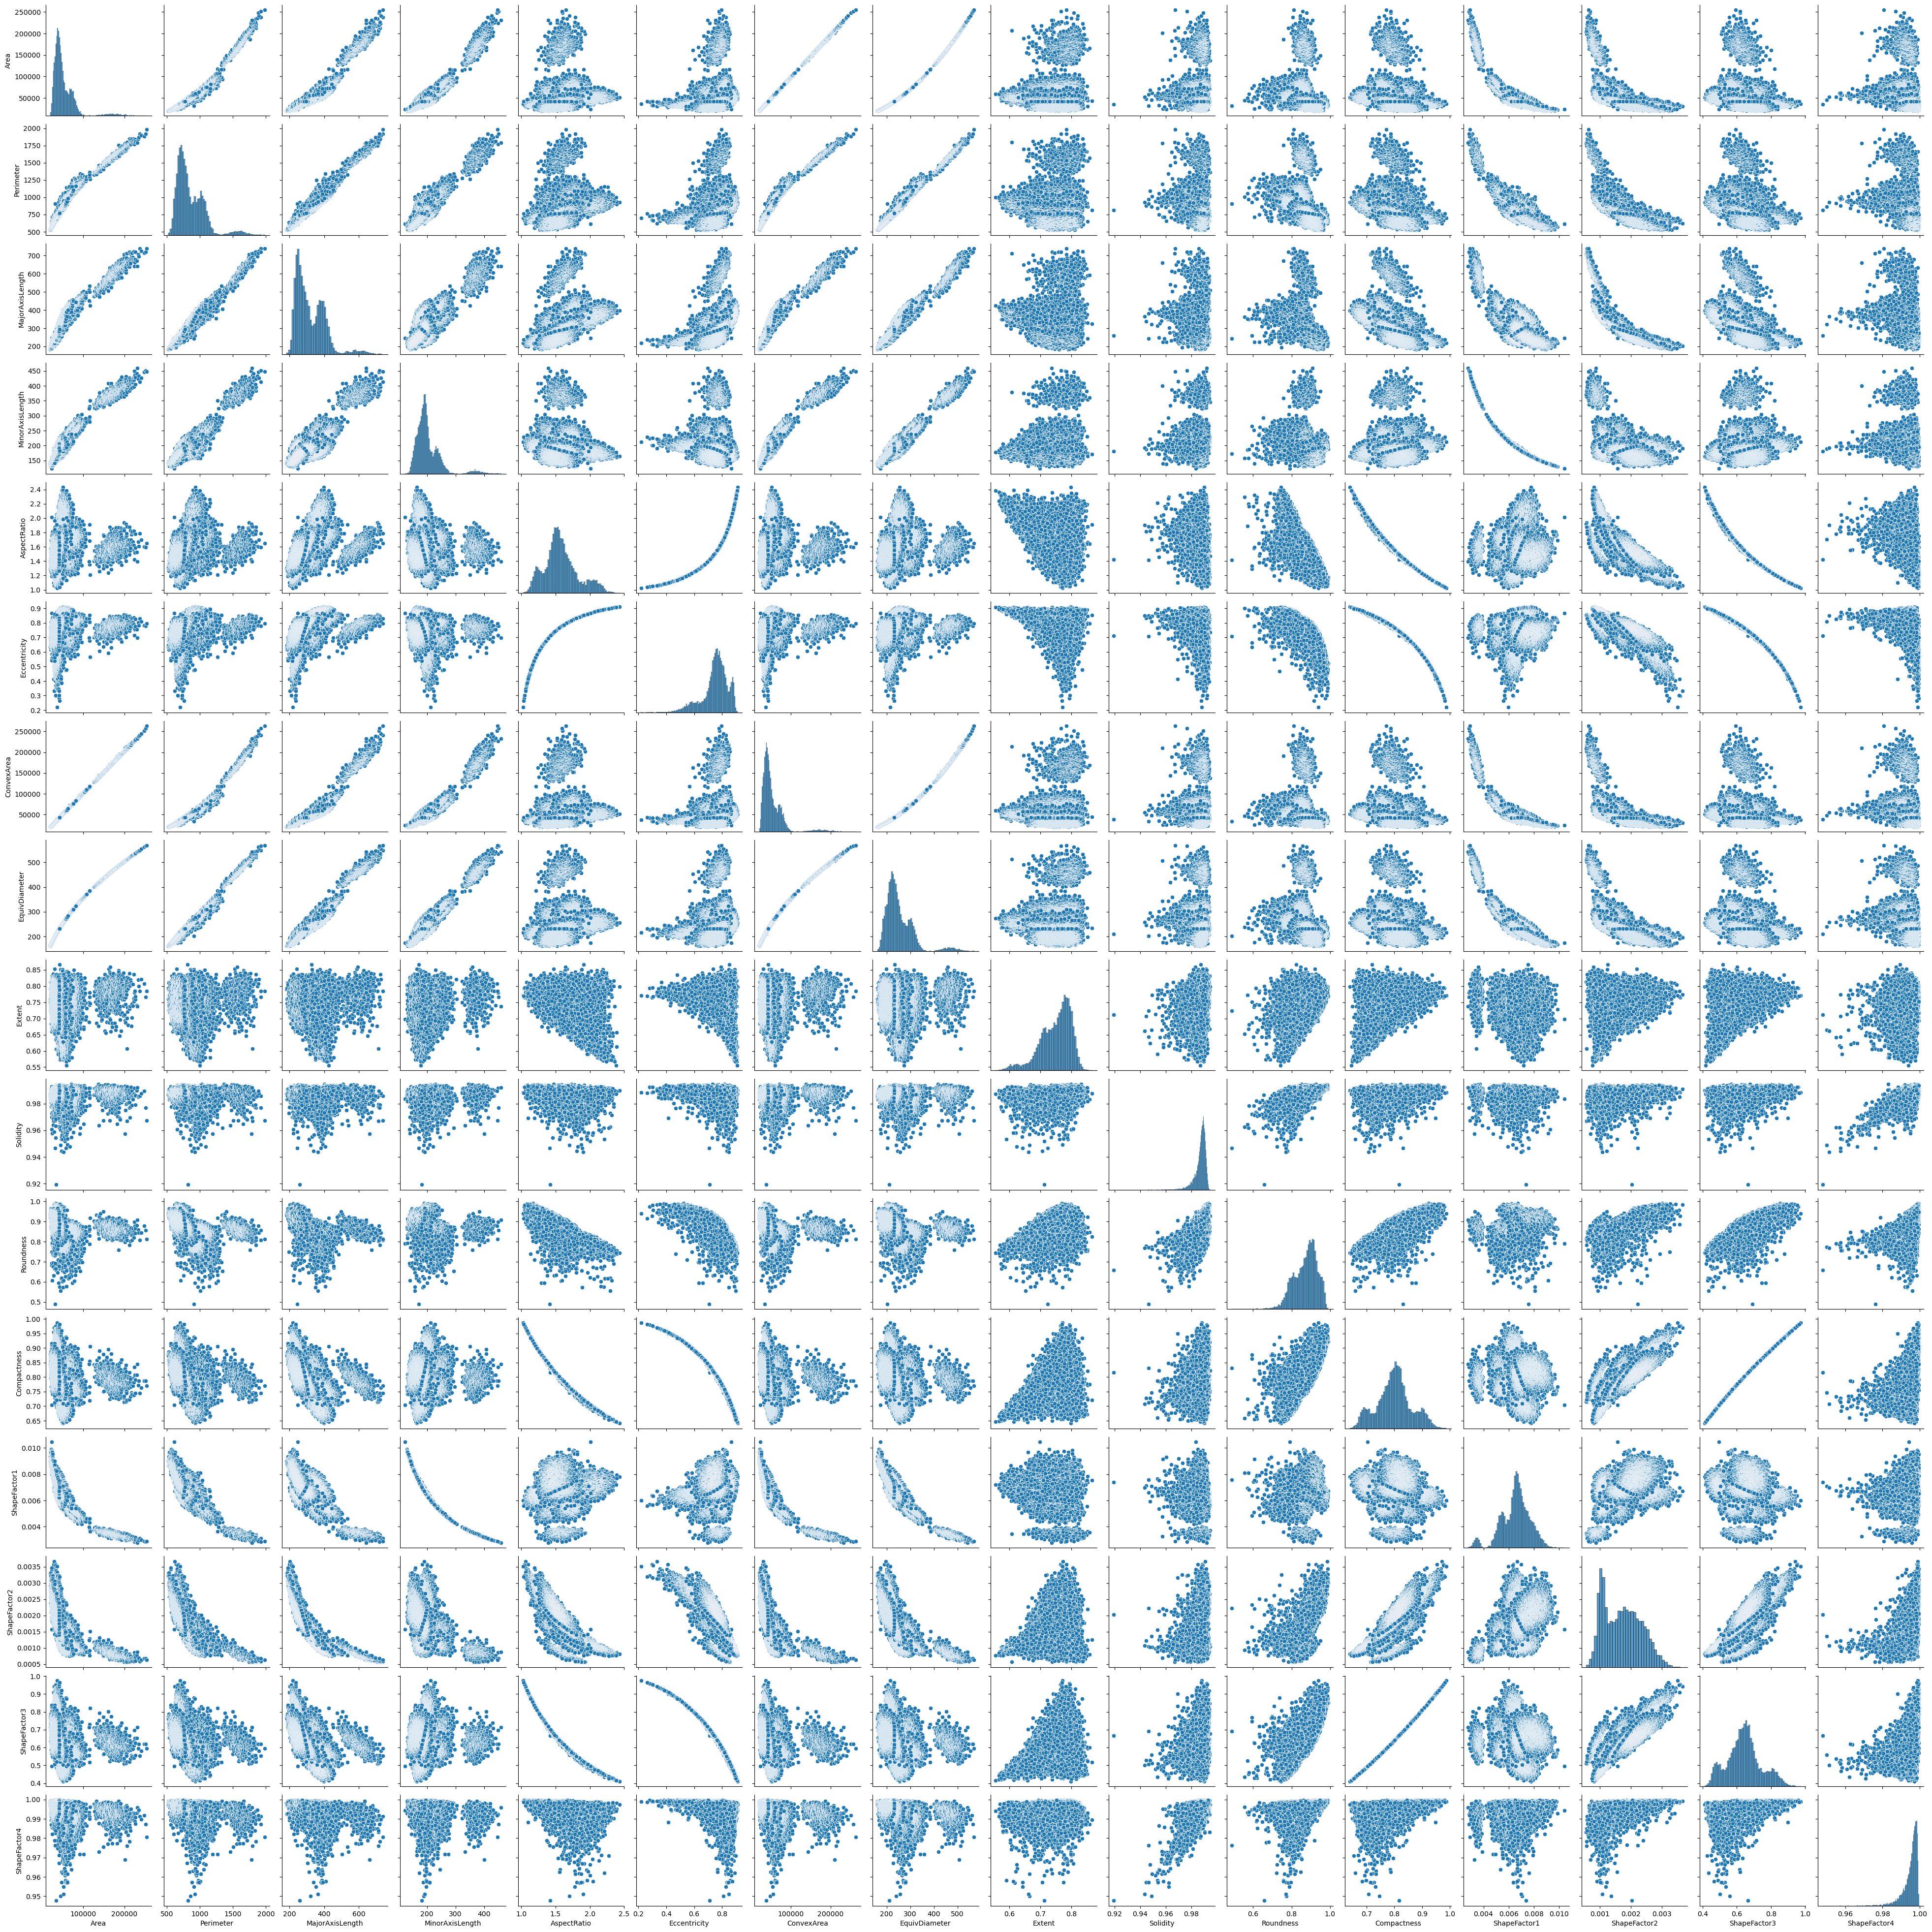

In [8]:
sns.pairplot(df)

**Observations from pairplot**: 

It is somewhat difficult to see individual features from a pairplot like this, just because of the number of features we have. Because we know which of the data are correlated, it may be more helpful to take a subset of unrelated features, such as Area, AspectRatio, and Compactness.

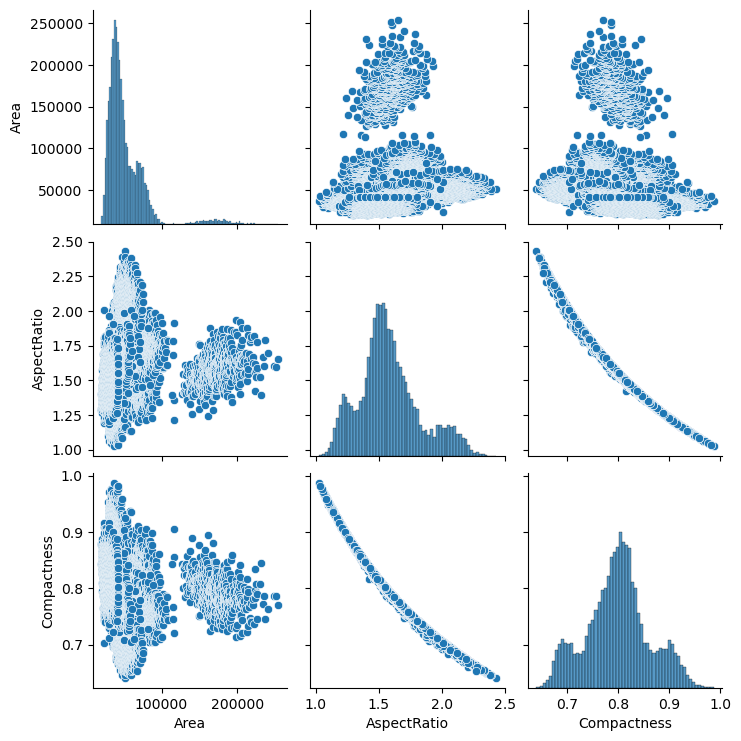

In [9]:
sns.pairplot(df[['Area', 'AspectRatio', 'Compactness']])

**Observations:**

On the pairplot between Area and AspectRatio, as well as Area and Compactness, we can see a decent amount of clustering for our data. The clusters overlap quite a large amount, but there is an additional cluster a bit more easily separable from the others. 

Our initial hypothesis is that each cluster will be a type of bean.

Of the features, we decide to plot `Area` and `AspectRatio`. AspectRatio is the ratio of the longer side of a bean to a shorter side, so that combined with the overall size of the bean should give a birds-eye view of how effective we should expect our model data to be.

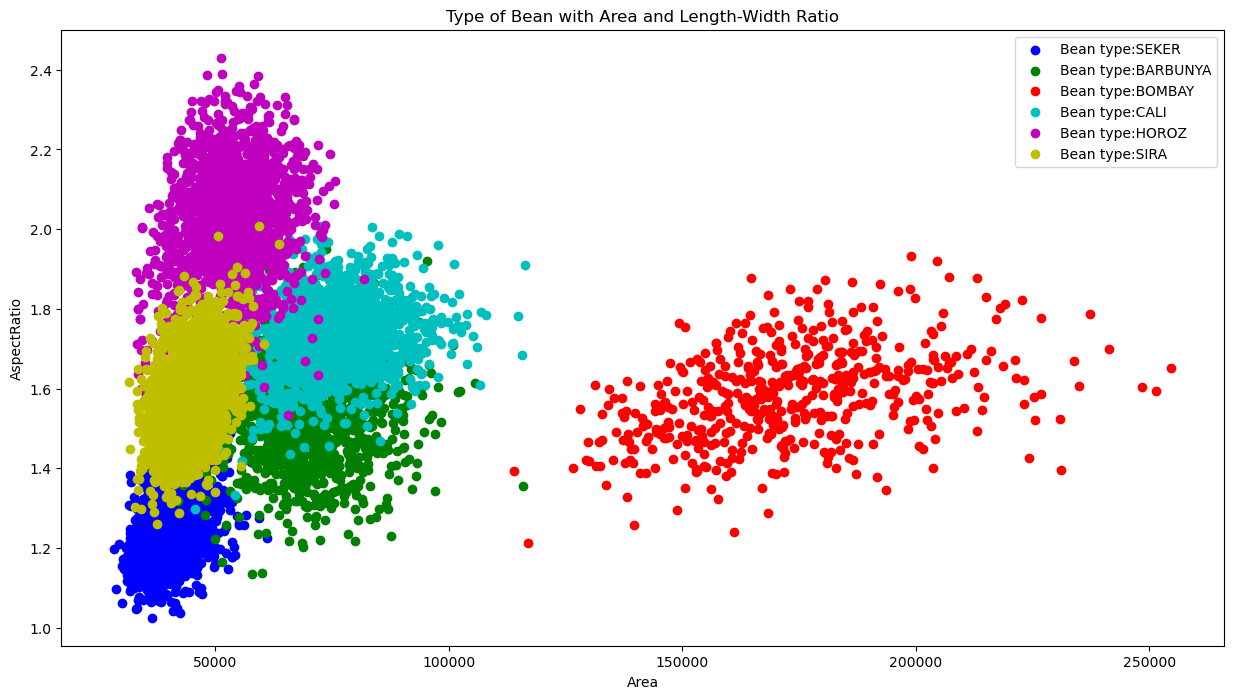

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
class_labels = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(6):
    plt.scatter(df.Area[df.Class == class_labels[i]],
            df.AspectRatio[df.Class == class_labels[i]], 
            color=colors[i], label=f'Bean type:{class_labels[i]}')
plt.xlabel('Area')
plt.ylabel('AspectRatio')
plt.legend()
plt.title('Type of Bean with Area and Length-Width Ratio')
plt.show()

**Observations:**

An aspect ratio of 1 implies the bean will be perfectly spherical (no side is longer than another). The higher the aspect ratio, the longer the bean will appear. The area of the bean is the relative size of the bean, in number of pixels.

We can immediately see that bombay beans have an almost completely separable area compared to every other bean type. So, our hypothesis was correct.

We can also see the other six types of beans clustering around different parts of area and aspect ratio. Because of how matplotlib plots data directly over itself, there is a lot of overlap between the beans that isn't quite apparent on this plot compared to the seaborn plot. However, this is initially quite promising when attempting to delve further into predicting bean type.

### Preparing Our Data for Model Building

We first check for missing values and duplicated values.

In [11]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

There are no missing values on any feature present. In other words, every bean has all of its data accounted for.

In [12]:
dupes = df[df.duplicated()]
print(dupes.shape[0])
dupes.head()

68


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
5505  33518    702.956       277.571399       154.305581     1.798842   
5509  33954    716.750       277.368480       156.356326     1.773951   
5548  38427    756.323       306.533886       160.591784     1.908777   
5554  38891    791.343       319.499996       156.869619     2.036723   
5599  40804    790.802       323.475648       163.287717     1.981016   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
5505      0.831240       34023     206.582775  0.808383  0.985157   0.852377   
5509      0.825970       34420     207.922042  0.799482  0.986461   0.830549   
5548      0.851782       38773     221.193978  0.796976  0.991076   0.844174   
5554      0.871168       39651     222.525412  0.650025  0.980833   0.780422   
5599      0.863241       41636     227.932592  0.787570  0.980017   0.819931   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
5505     0.744251      0.008281      0.001567      0.553909      0.996396   
5509     0.749624      0.008169      0.001591      0.561936      0.996847   
5548     0.721597      0.007977      0.001334      0.520702      0.993905   
5554     0.696480      0.008215      0.001192      0.485085      0.987983   
5599     0.704636      0.007928      0.001206      0.496512      0.983598   

      Class  
5505  HOROZ  
5509  HOROZ  
5548  HOROZ  
5554  HOROZ  
5599  HOROZ

**Observations:**

Duplicates exist. There are 68 copied items, with every single feature exactly the same. Two points fuel our decision on whether to remove them:
1. Area is the number of *pixels* that the bean takes up in the photo. This is very difficult (almost impossible) to replicate.
2. The data is almost exact with all of its measurements, going up to six decimal places in some features. Even rotation of the bean itself would likely cause a slight change in the number of pixels.

Therefore, these duplicated data are likely collected from exactly the same image. Because there is no ID associated with them that would disprove this, and 68/13K values is an extremely small subset, we can remove the values confidently.

In [13]:
df.drop_duplicates(inplace=True)

Because all data except our response are quantitative, there is no necessary encoding for our data points. This is a multiclass problem, but sklearn's ML algorithms are trained to work with multiclass categorical variables. 

We have successfully solved any issues of duplicates and missing values. So from here, we can begin to split our data and then train models with it.

In [14]:
df.to_csv("Clean_Bean_Data.csv")

### Splitting our Data then Scaling

One important aspect of building models is testing them: we want to ensure our data can generalize to a more broad data set, rather than just learning the data we have and being unable to generalize. Some ML algorithms tend to overfit our data, that is, have very precise requirements that allow it to score perfectly on our training data, but then be unable to correctly classify something new.

This is the reasoning behind the train-test split: we split our data into two groups: a larger training set that we train our models with, and a smaller test set that we evaluate our final model on. This final evaluation lets us draw otherwise impossible conclusions about our best model.

In [1]:
x_train, x_test, y_train, y_test = train_test_split(df, df['Class'], test_size=0.2, random_state=45, stratify=df[['Class']])
x_train = x_train.drop('Class', axis=1)
x_test = x_test.drop('Class', axis=1)
x_train.head()

NameError: name 'train_test_split' is not defined

To build our primitive models, we still want some way to compare our models without choosing the best one for the traning set (that would be data leakage). For creating these models, we use another train-test split to create a validation set. This will let us initially compare how well a few models will work.

In [16]:
x_primtrain, x_valid, y_primtrain, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=45, stratify=y_train)
x_primtrain.shape[0], x_valid.shape[0], x_train.shape[0]

(8667, 2167, 10834)

Now that we have our data splits, we will scale our data. ML algorithms such as K-Neighbors are optimized to work with standard scaling, so we use it.

For now, we will just fit a scaler to our new train-validation split.

In [17]:
#for train/validation set
primitive_scaler = StandardScaler()
x_primtrain = pd.DataFrame(primitive_scaler.fit_transform(x_primtrain), columns = x_train.columns)
x_valid = pd.DataFrame(primitive_scaler.transform(x_valid), columns = x_test.columns)

x_train.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
5412  91751   1146.703       445.176120       264.370534     1.683910   
5347  87979   1148.631       443.738692       255.653953     1.735700   
8168  42001    768.513       285.177858       188.821847     1.510301   
2118  54677    911.022       308.853903       226.398571     1.364204   
6036  49573    880.556       350.312735       181.419348     1.930956   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
5412      0.804571       92725     341.790874  0.670871  0.989496   0.876837   
5347      0.817354       89768     334.691413  0.692835  0.980071   0.837969   
8168      0.749398       42528     231.251668  0.772304  0.987608   0.893649   
2118      0.680198       55858     263.850182  0.753013  0.978857   0.827860   
6036      0.855454       50084     251.233565  0.617025  0.989797   0.803417   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
5412     0.767766      0.004852      0.001040      0.589464      0.992604  
5347     0.754253      0.005044      0.001007      0.568898      0.987437  
8168     0.810903      0.006790      0.001811      0.657564      0.993120  
2118     0.854288      0.005649      0.001856      0.729808      0.995607  
6036     0.717169      0.007067      0.001153      0.514332      0.993152

Logistic regression is a good first step: we want to see if we can fit some hyperplane to our data to differentiate them. It is also parameterized, meaning we can associate a set of weights and bias to our data.

In [18]:
logreg = LogisticRegression(solver='lbfgs',
                            multi_class='multinomial',
                            C=1e-2,
                            random_state = 0)
logreg.fit(x_primtrain, y_primtrain)

logreg_report = classification_report(y_valid, logreg.predict(x_valid))
print(logreg_report)

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.87      0.91       211
      BOMBAY       1.00      0.99      0.99        84
        CALI       0.93      0.95      0.94       261
    DERMASON       0.91      0.91      0.91       567
       HOROZ       0.96      0.93      0.94       298
       SEKER       0.94      0.94      0.94       324
        SIRA       0.83      0.87      0.85       422

    accuracy                           0.91      2167
   macro avg       0.93      0.92      0.93      2167
weighted avg       0.91      0.91      0.91      2167



In [19]:
print("F1 score of logistic regression:", f1_score(y_valid, logreg.predict(x_valid), average='weighted'))

F1 score of logistic regression: 0.9140192281155911


**Observations**: 
The main thing to note here is from a simple logistic model, we can get about 93% accuracy on our validation set. We are also able to get 100% accuracy on our Bombay data set, which is expected because it was more visibly separated than other parts of our data.

Because our data is clustered together, we may want to examine k nearest neighbors as a candidate model. By examining the (in our case, 5) nearest neighbors to a data point, we can predict which type of class that instance will be.

In [20]:
knn=KNeighborsClassifier(algorithm='auto',metric='euclidean',n_neighbors=5, p=2, weights='uniform')
knn.fit(x_primtrain,y_primtrain)

knn_report = classification_report(y_valid, knn.predict(x_valid))
print(knn_report)

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       211
      BOMBAY       1.00      1.00      1.00        84
        CALI       0.95      0.94      0.94       261
    DERMASON       0.91      0.92      0.91       567
       HOROZ       0.96      0.94      0.95       298
       SEKER       0.95      0.95      0.95       324
        SIRA       0.84      0.87      0.86       422

    accuracy                           0.92      2167
   macro avg       0.93      0.93      0.93      2167
weighted avg       0.92      0.92      0.92      2167



In [21]:
print("F1 score of KNN:", f1_score(y_valid, knn.predict(x_valid), average='weighted'))

F1 score of KNN: 0.9194561073540584


**Observations**:

K-Nearest Neighbors seems to do similarly to logistic regression, as it has a very slightly worse F1 score. Perhaps a different distance metric or number of neighbors to examine would let our model perform better. This is what fuels our grid search later on.

We also turn to a decision tree, which is a tree of questions to traverse, and at each leaf is a class label.

In [22]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=5)
decision_tree = decision_tree.fit(x_primtrain, y_primtrain)

tree_report = classification_report(y_valid, decision_tree.predict(x_valid))
print(tree_report)

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.63      0.73       211
      BOMBAY       1.00      1.00      1.00        84
        CALI       0.75      0.91      0.82       261
    DERMASON       0.91      0.88      0.89       567
       HOROZ       0.98      0.87      0.92       298
       SEKER       0.95      0.94      0.94       324
        SIRA       0.78      0.89      0.83       422

    accuracy                           0.87      2167
   macro avg       0.89      0.87      0.88      2167
weighted avg       0.88      0.87      0.87      2167



In [23]:
print("F1 score of Decision Tree:", f1_score(y_valid, decision_tree.predict(x_valid), average='weighted'))

F1 score of Decision Tree: 0.8720139066258624


**Observations:**

As we can see, a simple decision trees model performed poorly on the validation set. They are known to overfit data, which is why we opt for decision forests: an ensemble of decision trees that are all consulted when classifying a new instance. This ensemble of weak learners has been proven to be more resistant to overfitting. The main problem with fitting decision forests is choosing their hyperparameters: there are a huge amount of them and potential values we could place into them.

## Grid Search

To write each hyperparameter combination would be too time-consuming, and we would also want to compare them to our other models with k-nearest-neighbors and logistic regression. Grid Search allows us to fit a large amount of models with unique hyperparameter combinations. Using some measuring technique like AUC or an F1 score lets us compare how well we fit the data with each algorithm. F1 score does well in multiclass, so we choose that.

Grid search uses k fold cross validation, meaning that multiple validation sets are randomly created from the training set in the algorithm. So, we don't have a need for the x_primtrain and x_valid split: we can use all of the training data at once.

We go back to x_train and x_test for the remainder. We first scale them both based on x_train's centers.

In [24]:
#Scaling for full dataset
full_train_scaler = StandardScaler()
x_train = pd.DataFrame(full_train_scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(full_train_scaler.transform(x_test), columns = x_test.columns)

Then, we create a pipeline and give parameters to our grid search. These are all the values we want the grid search to consider. 

In [25]:
# Pipeline
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('classifier', LogisticRegression())])
#Grid parameters
grid_param = [
    {"classifier": [LogisticRegression()],
     "classifier__penalty": ['l2','l1'],
     "classifier__C": np.logspace(-4, 4, 9),
     "classifier__solver": ['saga'],
     "classifier__max_iter": [100000],
     "classifier__random_state": [2022]},
   
    {
        "classifier": [KNeighborsClassifier()],
        "classifier__n_neighbors": [3, 5, 7, 13, 15],
        "classifier__metric": ['l2', 'l1', 'cosine']
    },
   
    {"classifier": [RandomForestClassifier()],
     "classifier__n_estimators": [10, 100, 1000],
     "classifier__max_depth":[5, 8, 15, 25, None],
     "classifier__min_samples_leaf":[2, 5, 10, 15, 100],
     "classifier__max_leaf_nodes": [2, 5, 10, 15],
     "classifier__random_state": [2022]}
]

In [ ]:
gridsearch = GridSearchCV(pipe, grid_param, cv=5, scoring='f1_macro',
                          verbose=1, n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 333 candidates, totalling 1665 fits


The cell above will take a while to run. When it finishes, it will have the same parameters as listed below.

In [ ]:
best_model.best_params_

In [ ]:
best_params = {'classifier': LogisticRegression(C=100.0, max_iter=100000, penalty='l1', random_state=2022,
                    solver='saga'),
 'classifier__C': 100.0,
 'classifier__max_iter': 100000,
 'classifier__penalty': 'l1',
 'classifier__random_state': 2022,
 'classifier__solver': 'saga'}

For sake of time, the below code will create the same model without going through the exhaustive method of grid search.

In [ ]:
bestlogistic = LogisticRegression(C=100.0, max_iter=100000, penalty='l1', random_state=2022,
                    solver='saga')
bestlogistic.fit(x_train, y_train)

## Evaluating the Model and Discussion

The model that was chosen from grid search was a logistic regression model. This is helpful, because logistic regression is relatively quick to run and easy to explain compared to more complex training methods. It is also parameterized, meaning we can also examine the weight vectors.

In [ ]:
report = classification_report(y_test, bestlogistic.predict(x_test))
print(report)

In [ ]:
print("F1 score of model:", f1_score(y_test, bestlogistic.predict(x_test), average='weighted'))

It may initially seem a bit unnerving that the accuracy is lower than what we got for validation sets. But this is partly because of the randomness of our train-test splits. To validate that this is an effective model, running it on our prim_train and validation sets give an accuracy of 0.93 as well.

Our precision and recall on all bean types except Sira is exceptional. When re-examining the data, Sira was in the center of all of the clusters, so it makes sense that its accuracy would be a bit lower than other bean types which have fields that only they exist in.

To further illustrate this, we will examine the confusion matrix of the data.

In [ ]:
print(confusion_matrix(y_test, bestlogistic.predict(x_test)))
print(("Barbunya", "Bombay", "Cali", "Dermason", "Horoz", "Seker", "Sira"))

The main points of misclassification were between Barbunya and Cali, and Dermason and Sira. There was also some less prominent misclassification between Seker and Dermason, and Seker and Sira.

If the distinction between these two is particularly necessary (e.g. needing over a 95% accuracy for those) then it will be difficult to find a model that will be sufficiently useful. The law of diminishing returns suggests that we won't be able to find a model that suddenly performs significantly better than the one we have found. If misclassifications for one bean over another were significant then we could improve the precision of some pair at the cost of its recall, or vice versa.
 
That said, an F1 score of 0.91 is effective, and the high recall and precision for all bean types except for Sira is promising. More features may be necessary to better classify Sira compared to other bean types.

One final note: an ROC curve only shows pairwise, one-versus-the-rest or one-versus-one data. We have decided to omit this because that would be 7 curves for OVR, or 42 curves for OVO. The legibility of those models will be heavily reduced, and give limited additional insight than what the confusion matrix and F1 score have given.

## Conclusion

In this exploration, we have found a significantly effective model for predicting the type of bean imaged with a specialized camera. We have utilized various plots to understand the attributes of the data, and to recognize its flaws that limit perfection in the final model. We have fit a multiclass logistic model to it, whose effectiveness we have verified through grid search and multiclass scoring metrics. We have given recommendations on use for this model based on the user's goals with classification.

## Acknowledgements

Thank you to the professor for answering questions in office hours and their continued support.

Thank you to a friend for being a fantastic partner in this project!

Thank you to two other friends for helping to clarify syntax for grid search.

# References
* Building a Scikit-Learn Classification Pipeline: https://www.kaggle.com/code/gautham11/building-a-scikit-learn-classification-pipeline
* ConvergenceWarning: lbfgs failed to converge (status=1): https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
* ConvergenceWarning: liblinear failed to converge: https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati
* F1 Score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
* GridSearchCV representation of each class in each part of the DataFrame: https://stackoverflow.com/questions/50290273/gridsearchcv-representation-of-each-class-in-each-part-of-the-dataframe
* GridSearchCV with Pipeline: https://medium.com/@cmukesh8688/sklearn-pipeline-gridsearchcv-54f5552bbf4e#:~:text=Pipeline%20is%20used%20to%20assemble,pipeline%20module.&text=GridSearchCV%20is%20used%20to%20optimize,to%20find%20the%20best%20model.
* K-Nearest Neighbors for Multiclass Classification: https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76
* ML Pipeline with Grid Search: https://github.com/wlongxiang/mlpipeline/blob/main/ml_pipeline_with_grid_search.ipynb
* Multiclass Classification Evaluation with ROC Curves and ROC AUC: https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a
* Pairwise Distance Metrics: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics
* Renaming Column Names in Pandas: https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
* Scikit-learn Decision Trees: https://scikit-learn.org/stable/modules/tree.html
* Scikit-learn KNeighborsClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* Scikit-learn Support Vector Classification: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* StackOverflow - Describing groups in Pandas: https://stackoverflow.com/questions/33575587/pandas-dataframe-how-to-apply-describe-to-each-group-and-add-to-new-columns
* StackOverflow - Getting a Warning when using sklearn neighbors about keepdims: https://stackoverflow.com/questions/74877602/getting-a-warning-when-using-sklearn-neighbors-about-keepdims
* UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples: https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi
* Using GridSearchCV to Find Optimal Parameters: https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv
* Named colors in Matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html